# FORECASTING

Objective:
Oil is a product that goes completely in a different direction for a single market event as
the oil prices are rarely based on real-time data, instead, it is driven by externalities
making our attempt to forecast it even more challenging
As the economy will be highly affected by oil prices our model will help to understand
the pattern in prices to help the customers and businesses to make smart decisions.

dataset collected from : https://fred.stlouisfed.org/series/DCOILWTICO#

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("DCOILWTICO.csv")
df

DATE  DCOILWTICO
0      12/1/1986       15.29
1      12/2/1986       15.22
2      12/3/1986       15.13
3      12/4/1986       15.20
4      12/5/1986       15.14
...          ...         ...
9401  12/13/2022       75.44
9402  12/14/2022       77.14
9403  12/15/2022       75.89
9404  12/16/2022       74.19
9405  12/19/2022       75.05

[9406 rows x 2 columns]

# Exploratory data analysis (EDA)

In [3]:
df.head()

DATE  DCOILWTICO
0  12/1/1986       15.29
1  12/2/1986       15.22
2  12/3/1986       15.13
3  12/4/1986       15.20
4  12/5/1986       15.14

In [4]:
df.tail()

DATE  DCOILWTICO
9401  12/13/2022       75.44
9402  12/14/2022       77.14
9403  12/15/2022       75.89
9404  12/16/2022       74.19
9405  12/19/2022       75.05

In [5]:
df.shape

(9406, 2)

In [6]:
df.sample(10)

DATE  DCOILWTICO
4176   12/3/2002       27.34
7992   7/19/2017       47.10
1730   7/19/1993       17.68
6152   6/30/2010       75.59
1272  10/16/1991       23.67
7498   8/27/2015       42.47
1600   1/18/1993       18.94
73     3/12/1987       18.42
4584   6/25/2004       37.34
3574   8/11/2000       31.02

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9406 entries, 0 to 9405
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        9406 non-null   object 
 1   DCOILWTICO  9085 non-null   float64
dtypes: float64(1), object(1)
memory usage: 147.1+ KB


In [8]:
df.describe()

DCOILWTICO
count  9085.000000
mean     46.793643
std      29.540224
min     -36.980000
25%      20.260000
50%      37.580000
75%      68.060000
max     145.310000

In [9]:
df.columns

Index(['DATE', 'DCOILWTICO'], dtype='object')

In [10]:
df.isnull().sum()

DATE            0
DCOILWTICO    321
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.rename(columns={"DATE":"date","DCOILWTICO":"price"},inplace=True)
df

date  price
0      12/1/1986  15.29
1      12/2/1986  15.22
2      12/3/1986  15.13
3      12/4/1986  15.20
4      12/5/1986  15.14
...          ...    ...
9401  12/13/2022  75.44
9402  12/14/2022  77.14
9403  12/15/2022  75.89
9404  12/16/2022  74.19
9405  12/19/2022  75.05

[9406 rows x 2 columns]

In [13]:
df["Forward_Fill"] = df["price"].ffill()
df

date  price  Forward_Fill
0      12/1/1986  15.29         15.29
1      12/2/1986  15.22         15.22
2      12/3/1986  15.13         15.13
3      12/4/1986  15.20         15.20
4      12/5/1986  15.14         15.14
...          ...    ...           ...
9401  12/13/2022  75.44         75.44
9402  12/14/2022  77.14         77.14
9403  12/15/2022  75.89         75.89
9404  12/16/2022  74.19         74.19
9405  12/19/2022  75.05         75.05

[9406 rows x 3 columns]

In [14]:
df.drop("price",axis=1,inplace=True)
df

date  Forward_Fill
0      12/1/1986         15.29
1      12/2/1986         15.22
2      12/3/1986         15.13
3      12/4/1986         15.20
4      12/5/1986         15.14
...          ...           ...
9401  12/13/2022         75.44
9402  12/14/2022         77.14
9403  12/15/2022         75.89
9404  12/16/2022         74.19
9405  12/19/2022         75.05

[9406 rows x 2 columns]

In [15]:
df.isnull().sum()

date            0
Forward_Fill    0
dtype: int64

In [16]:
df.dtypes

date             object
Forward_Fill    float64
dtype: object

In [17]:
df['date']=pd.to_datetime(df.date)

In [18]:
df.dtypes

date            datetime64[ns]
Forward_Fill           float64
dtype: object

In [19]:
data1=df.copy()
data1

date  Forward_Fill
0    1986-12-01         15.29
1    1986-12-02         15.22
2    1986-12-03         15.13
3    1986-12-04         15.20
4    1986-12-05         15.14
...         ...           ...
9401 2022-12-13         75.44
9402 2022-12-14         77.14
9403 2022-12-15         75.89
9404 2022-12-16         74.19
9405 2022-12-19         75.05

[9406 rows x 2 columns]

In [20]:
data1["date"] = pd.to_datetime(data1.date,format="%b-%y")
data1["month"] =data1.date.dt.strftime("%b") # month extraction
data1["year"] = data1.date.dt.strftime("%Y") # year extraction
data1.head(100)

date  Forward_Fill month  year
0  1986-12-01         15.29   Dec  1986
1  1986-12-02         15.22   Dec  1986
2  1986-12-03         15.13   Dec  1986
3  1986-12-04         15.20   Dec  1986
4  1986-12-05         15.14   Dec  1986
..        ...           ...   ...   ...
95 1987-04-13         18.07   Apr  1987
96 1987-04-14         18.09   Apr  1987
97 1987-04-15         18.46   Apr  1987
98 1987-04-16         18.58   Apr  1987
99 1987-04-17         18.58   Apr  1987

[100 rows x 4 columns]

<AxesSubplot:xlabel='month', ylabel='year'>

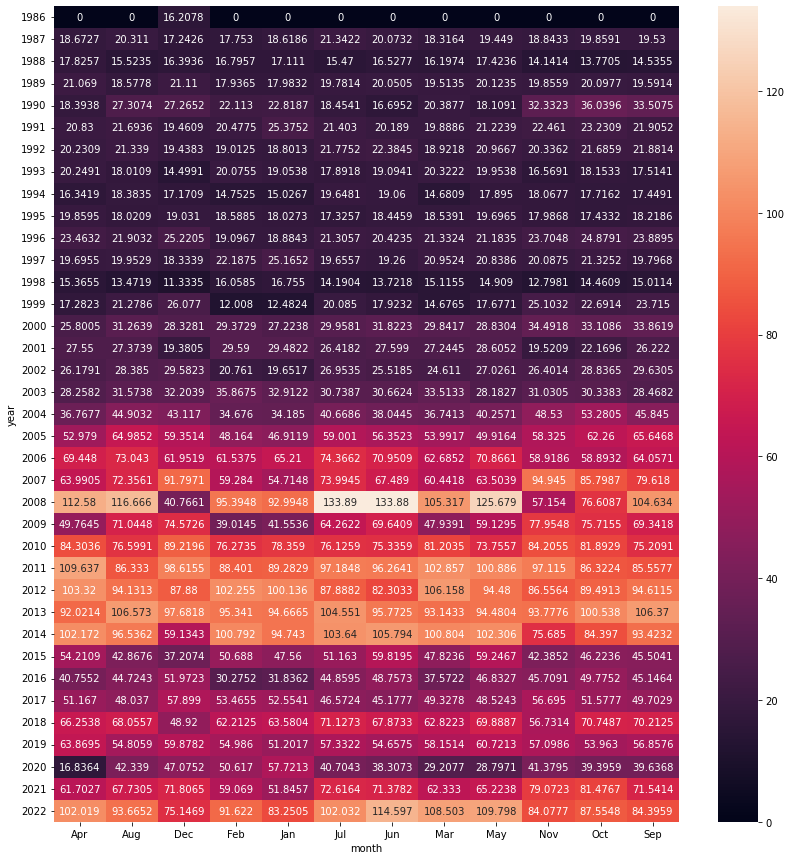

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(14,15))
heatmap_y_month = pd.pivot_table(data=data1,values="Forward_Fill",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Forward_Fill'>

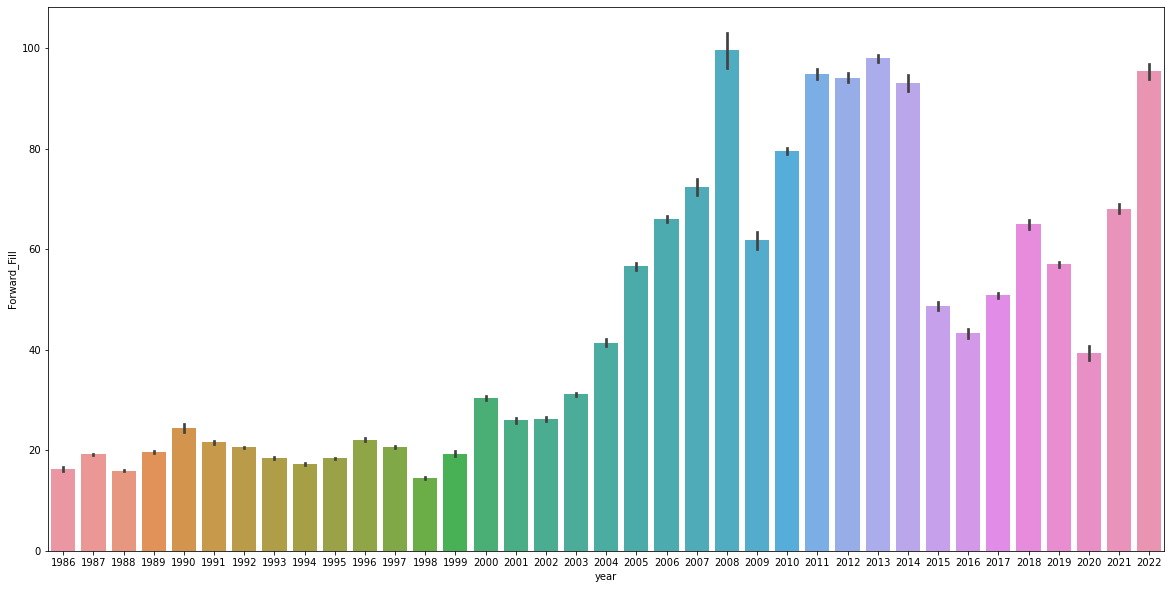

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x="year",y="Forward_Fill",data=data1)

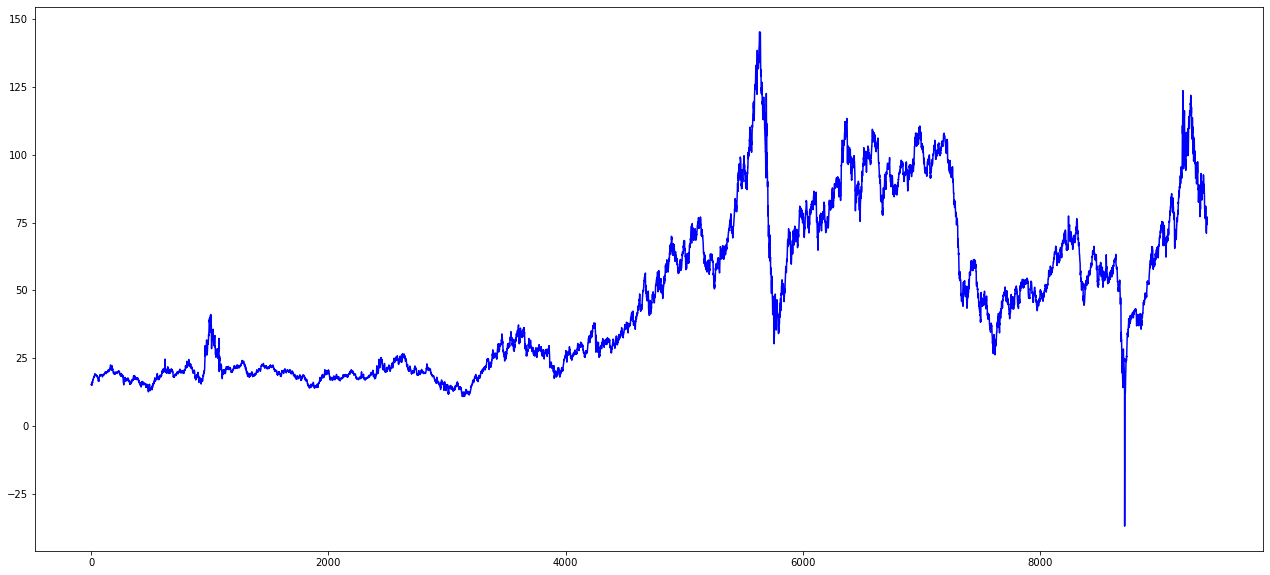

In [23]:
data1['Forward_Fill'].plot(figsize=(22, 10),color='blue')
plt.show()

<AxesSubplot:xlabel='month', ylabel='Forward_Fill'>

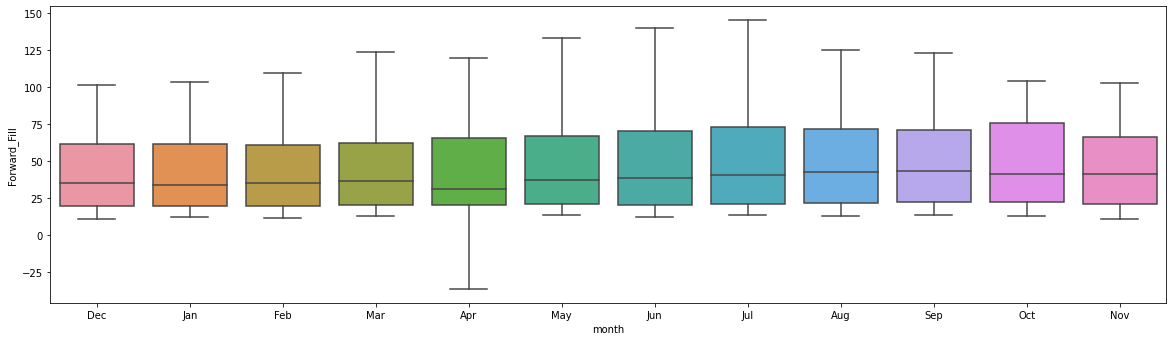

In [24]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.boxplot(x="month",y="Forward_Fill",data=data1)

<AxesSubplot:xlabel='year', ylabel='Forward_Fill'>

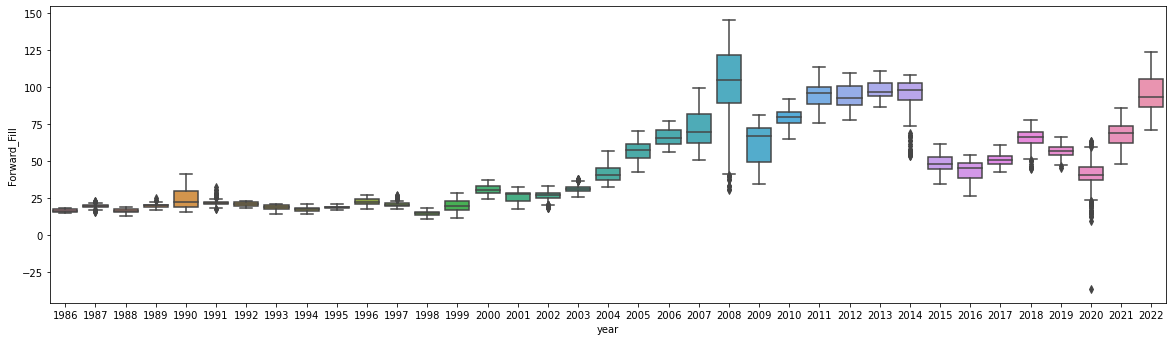

In [25]:
plt.figure(figsize=(20,12))
plt.subplot(212)
sns.boxplot(x="year",y="Forward_Fill",data=data1)

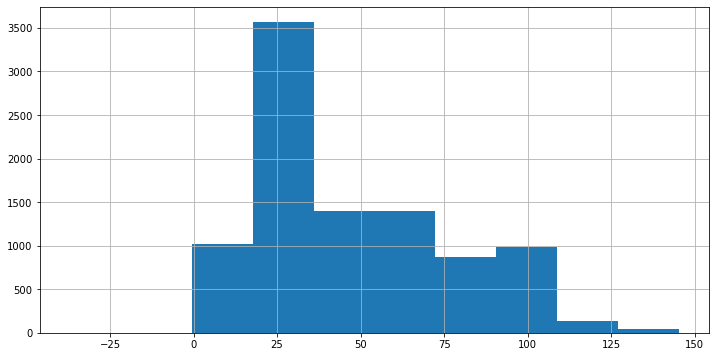

In [26]:
data1.Forward_Fill.hist(figsize=(12,6))
plt.show()

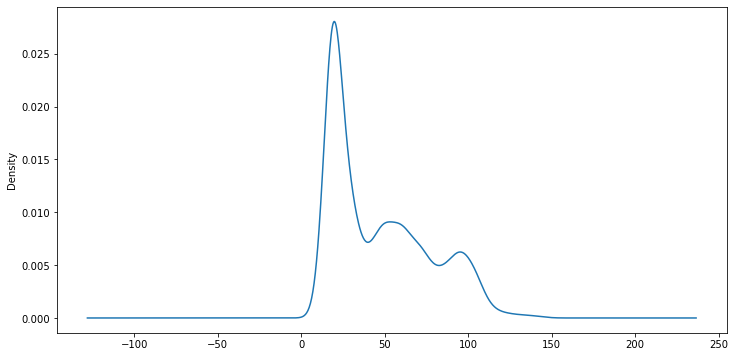

In [27]:
# create a density plot
data1.Forward_Fill.plot(kind='kde', figsize=(12,6))
plt.show()

In [28]:
data1.set_index('date',inplace=True)
data1

Forward_Fill month  year
date                                
1986-12-01         15.29   Dec  1986
1986-12-02         15.22   Dec  1986
1986-12-03         15.13   Dec  1986
1986-12-04         15.20   Dec  1986
1986-12-05         15.14   Dec  1986
...                  ...   ...   ...
2022-12-13         75.44   Dec  2022
2022-12-14         77.14   Dec  2022
2022-12-15         75.89   Dec  2022
2022-12-16         74.19   Dec  2022
2022-12-19         75.05   Dec  2022

[9406 rows x 3 columns]

In [29]:
np.array(data1["Forward_Fill"])

array([15.29, 15.22, 15.13, ..., 75.89, 74.19, 75.05])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

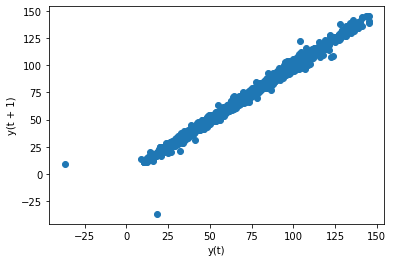

In [30]:
from pandas.plotting import lag_plot
lag_plot(data1['Forward_Fill'])

<AxesSubplot:xlabel='year', ylabel='Forward_Fill'>

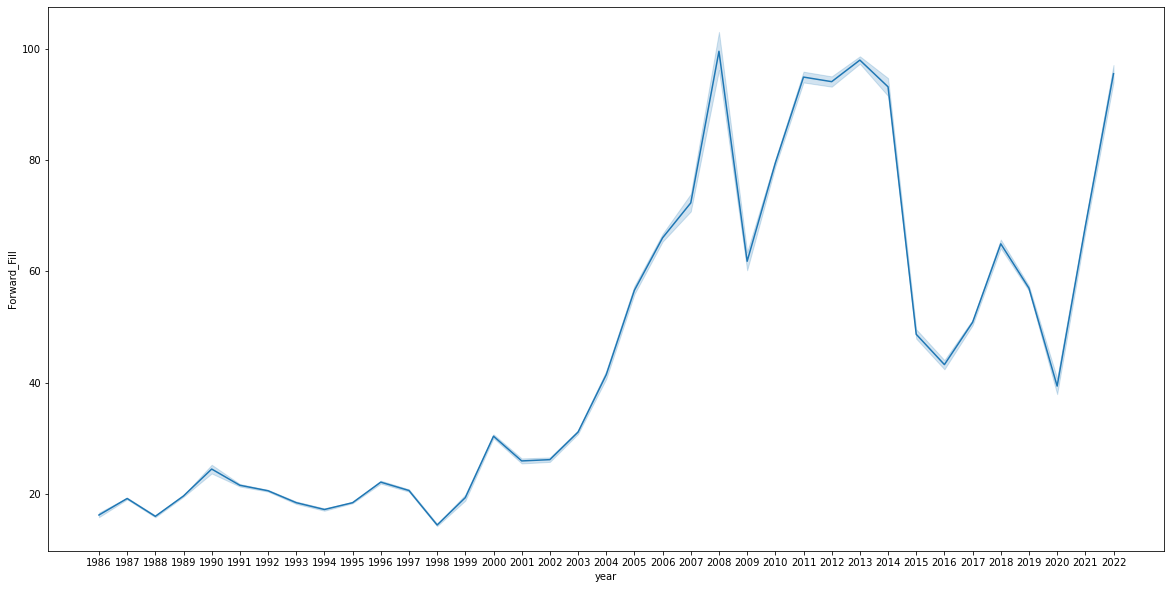

In [31]:
plt.figure(figsize=(20,10))
sns.lineplot(x="year",y="Forward_Fill",data=data1)

# Decomposing our time series

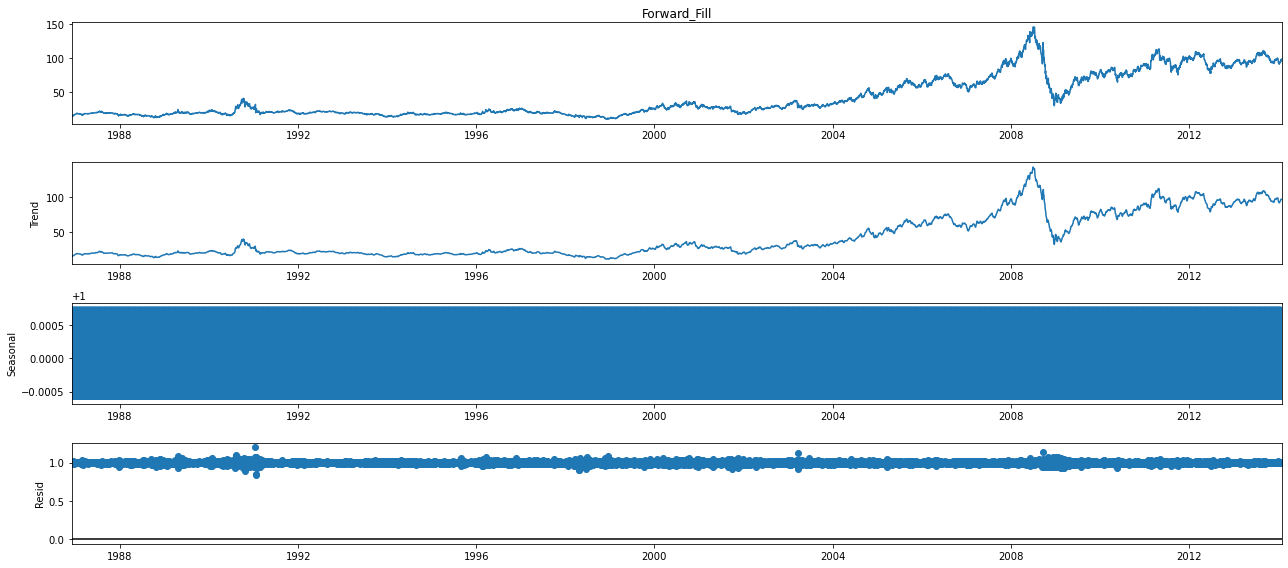

<Figure size 4000x1600 with 0 Axes>

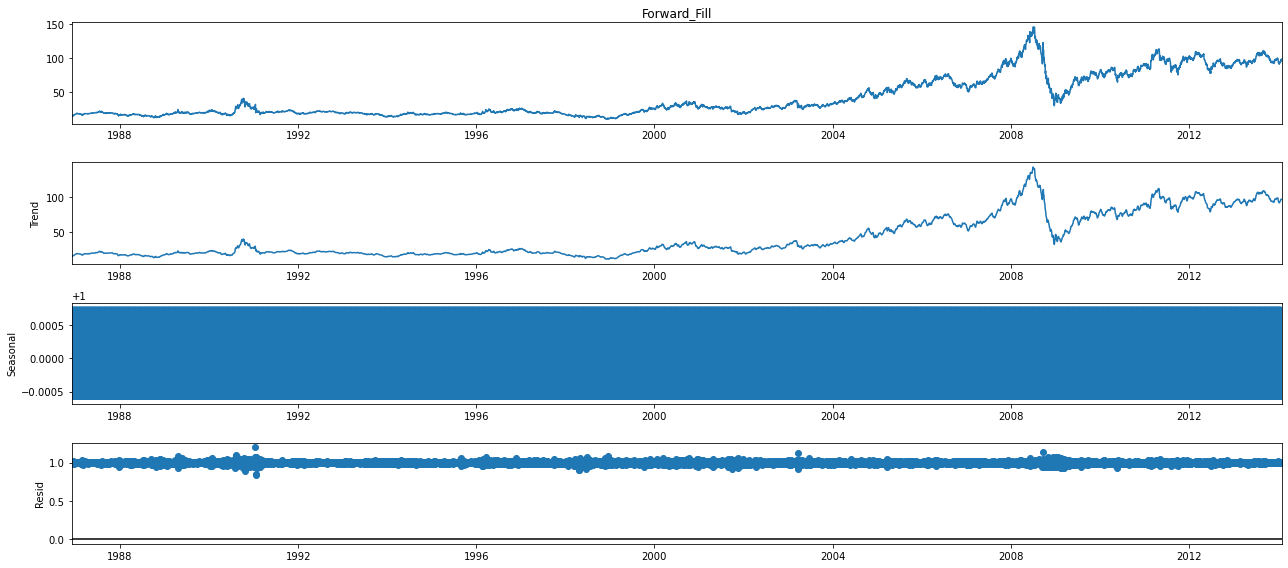

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = data1.Forward_Fill[:7089]
result = seasonal_decompose(series, model='multiplicative')
result.plot()

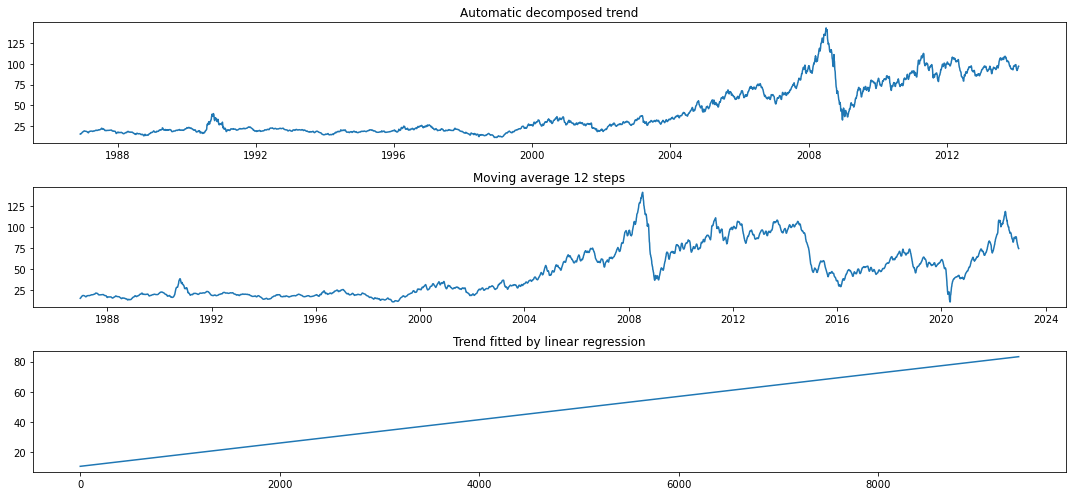

In [33]:
from sklearn.linear_model import LinearRegression
fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)
pm_ax.plot(result.trend)
pm_ax.set_title("Automatic decomposed trend")
mm = data1.Forward_Fill.rolling(12).mean()
mv_ax.plot(mm)
mv_ax.set_title("Moving average 12 steps")
X = [i for i in range(0, len(data1.Forward_Fill))]
X = np.reshape(X, (len(X), 1))
y = data1.Forward_Fill.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Trend fitted by linear regression")
plt.tight_layout()

# Testing for Stationarity


C:\Users\Priyanka\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


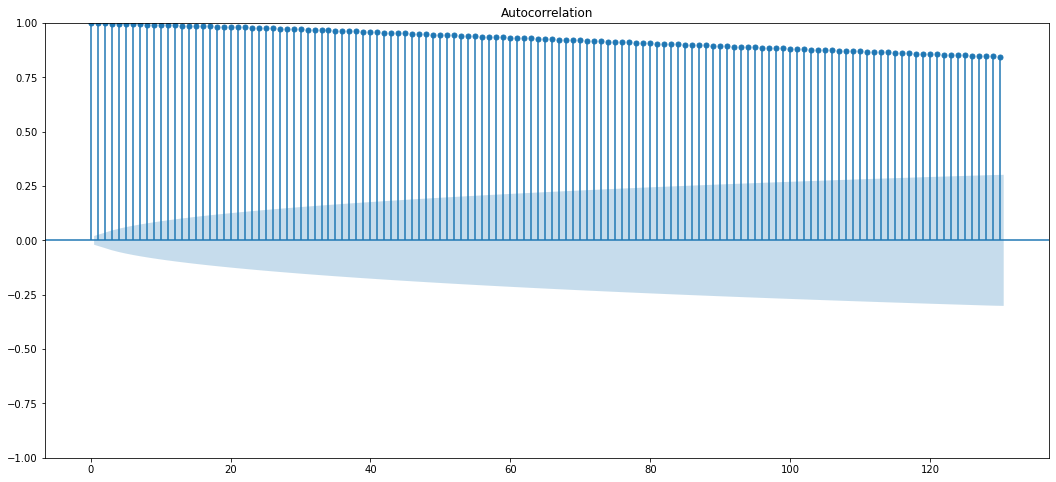

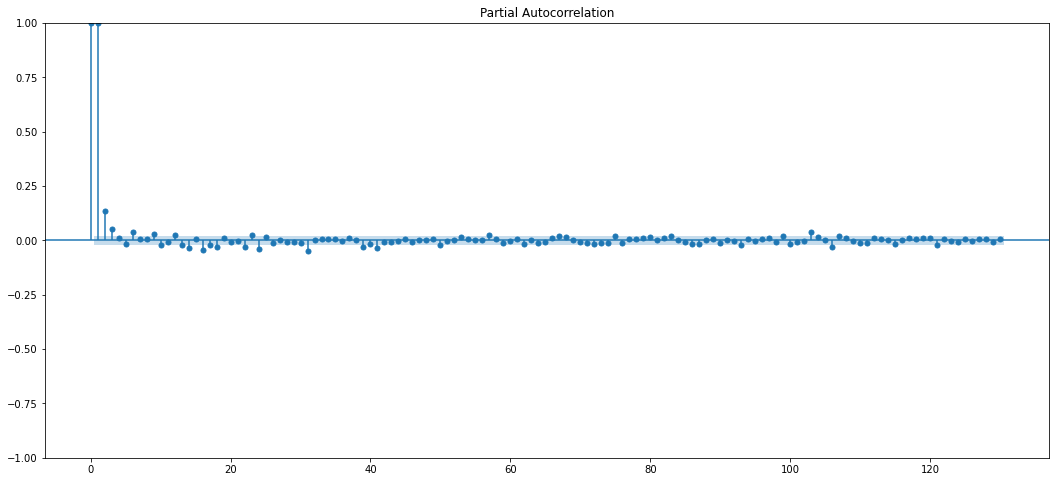

In [34]:
#Autocorrelation and Partial autocorrelation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data1.Forward_Fill,lags=130)
plot_pacf(data1.Forward_Fill,lags=130)
plt.show()

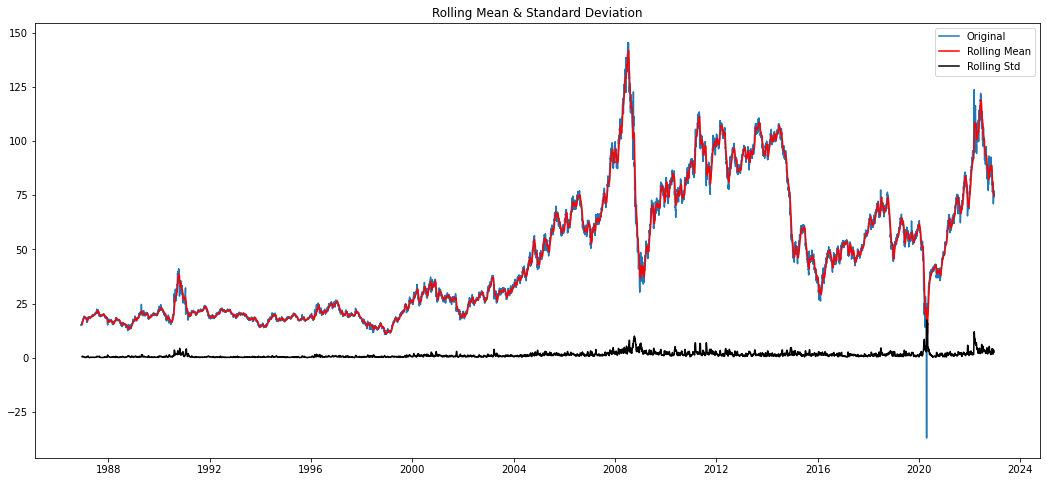

In [35]:
# Determing rolling statistics
rolmean = data1.Forward_Fill.rolling(window=12).mean()
rolstd = data1.Forward_Fill.rolling(window=12).std()

# Plot rolling statistics:
orig = plt.plot(data1.Forward_Fill, label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [36]:
## Testing for Stationarity
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data1['Forward_Fill'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Forward_Fill):
    result=adfuller(Forward_Fill)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [37]:
adfuller_test(data1['Forward_Fill'])

ADF Test Statistic : -2.2969331142234233
p-value : 0.1729590111854808
#Lags Used : 30
Number of Observations Used : 9375
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [38]:
data1['Forward_Fill First Difference'] = data1['Forward_Fill'] - data1['Forward_Fill'].shift(1)
data1['Forward_Fill'].shift(1)

date
1986-12-01      NaN
1986-12-02    15.29
1986-12-03    15.22
1986-12-04    15.13
1986-12-05    15.20
              ...  
2022-12-13    72.96
2022-12-14    75.44
2022-12-15    77.14
2022-12-16    75.89
2022-12-19    74.19
Name: Forward_Fill, Length: 9406, dtype: float64

In [39]:
data1['Seasonal First Difference']=data1['Forward_Fill']-data1['Forward_Fill'].shift(12)
data1.head()

Forward_Fill month  year  Forward_Fill First Difference  \
date                                                                  
1986-12-01         15.29   Dec  1986                            NaN   
1986-12-02         15.22   Dec  1986                          -0.07   
1986-12-03         15.13   Dec  1986                          -0.09   
1986-12-04         15.20   Dec  1986                           0.07   
1986-12-05         15.14   Dec  1986                          -0.06   

            Seasonal First Difference  
date                                   
1986-12-01                        NaN  
1986-12-02                        NaN  
1986-12-03                        NaN  
1986-12-04                        NaN  
1986-12-05                        NaN

In [40]:
## Again test dickey fuller test
adfuller_test(data1['Seasonal First Difference'].dropna())

ADF Test Statistic : -10.780025011122177
p-value : 2.2676454752570256e-19
#Lags Used : 37
Number of Observations Used : 9356
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='date'>

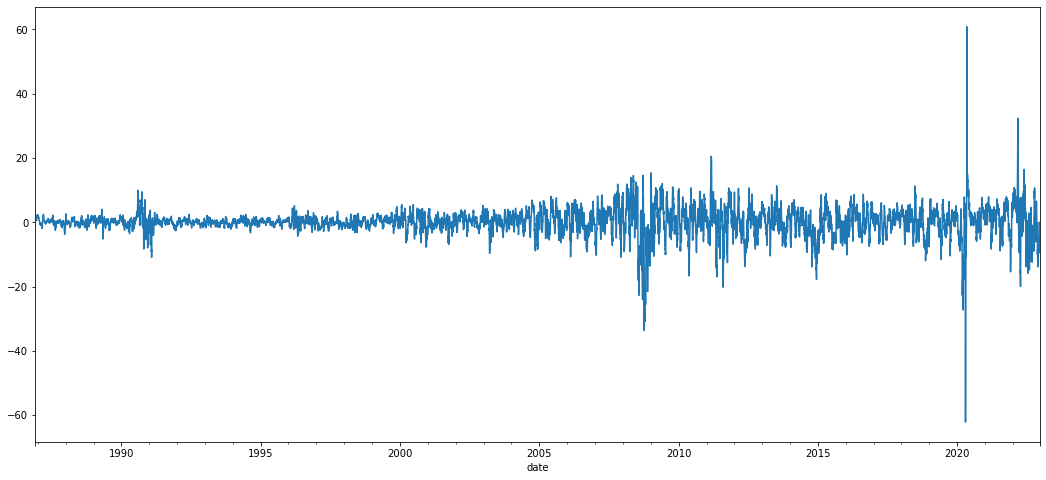

In [41]:
data1['Seasonal First Difference'].plot()

In [42]:
#install FB Prophet and yfinance
#!pip install prophet
#!pip install yfinance

In [43]:
from prophet import Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [44]:
df.columns = ['ds','y']
df.head()

ds      y
0 1986-12-01  15.29
1 1986-12-02  15.22
2 1986-12-03  15.13
3 1986-12-04  15.20
4 1986-12-05  15.14

In [45]:
# Initialize the Model
model=Prophet()

In [46]:
model.fit(df)

15:22:57 - cmdstanpy - INFO - Chain [1] start processing
15:23:04 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [48]:
### Create future dates of 5 years
future_dates=model.make_future_dataframe(periods=1825)
future_dates.sample(10)

ds
7549  2015-11-06
4796  2005-04-19
6710  2012-08-20
10147 2024-12-30
2473  1996-05-23
2188  1995-04-20
259   1987-11-27
2229  1995-06-16
4655  2004-10-04
4090  2002-08-05

In [49]:
prediction=model.predict(future_dates)
prediction

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0     1986-12-01   17.206738    1.883579   28.951541    17.206738   
1     1986-12-02   17.209246    0.958416   29.877464    17.209246   
2     1986-12-03   17.211754    1.849802   28.868691    17.211754   
3     1986-12-04   17.214261    0.718387   27.866593    17.214261   
4     1986-12-05   17.216769    0.240531   28.154605    17.216769   
...          ...         ...         ...         ...          ...   
11226 2027-12-14  103.460741   53.951923  144.134396    59.516822   
11227 2027-12-15  103.474864   56.540444  142.835510    59.488110   
11228 2027-12-16  103.488988   53.008869  143.314115    59.452408   
11229 2027-12-17  103.503111   55.970579  142.951034    59.431955   
11230 2027-12-18  103.517235   51.216148  141.589345    59.416663   

       trend_upper  additive_terms  additive_terms_lower  \
0        17.206738       -1.952724             -1.952724   
1        17.209246       -2.030024             -2.030024   
2        17.211754       -2.087321             -2.087321   
3        17.214261       -2.150742             -2.150742   
4        17.216769       -2.190037             -2.190037   
...            ...             ...                   ...   
11226   144.037088       -2.578357             -2.578357   
11227   144.081243       -2.550433             -2.550433   
11228   144.125398       -2.526073             -2.526073   
11229   144.169552       -2.476112             -2.476112   
11230   144.213707       -3.957851             -3.957851   

       additive_terms_upper    weekly  weekly_lower  weekly_upper    yearly  \
0                 -1.952724  0.382011      0.382011      0.382011 -2.334735   
1                 -2.030024  0.391499      0.391499      0.391499 -2.421523   
2                 -2.087321  0.416753      0.416753      0.416753 -2.504074   
3                 -2.150742  0.430896      0.430896      0.430896 -2.581638   
4                 -2.190037  0.463483      0.463483      0.463483 -2.653520   
...                     ...       ...           ...           ...       ...   
11226             -2.578357  0.391499      0.391499      0.391499 -2.969856   
11227             -2.550433  0.416753      0.416753      0.416753 -2.967186   
11228             -2.526073  0.430896      0.430896      0.430896 -2.956969   
11229             -2.476112  0.463483      0.463483      0.463483 -2.939596   
11230             -3.957851 -1.042322     -1.042322     -1.042322 -2.915529   

       yearly_lower  yearly_upper  multiplicative_terms  \
0         -2.334735     -2.334735                   0.0   
1         -2.421523     -2.421523                   0.0   
2         -2.504074     -2.504074                   0.0   
3         -2.581638     -2.581638                   0.0   
4         -2.653520     -2.653520                   0.0   
...             ...           ...                   ...   
11226     -2.969856     -2.969856                   0.0   
11227     -2.967186     -2.967186                   0.0   
11228     -2.956969     -2.956969                   0.0   
11229     -2.939596     -2.939596                   0.0   
11230     -2.915529     -2.915529                   0.0   

       multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                             0.0                         0.0   15.254015  
1                             0.0                         0.0   15.179222  
2                             0.0                         0.0   15.124433  
3                             0.0                         0.0   15.063520  
4                             0.0                         0.0   15.026733  
...                           ...                         ...         ...  
11226                         0.0                         0.0  100.882383  
11227                         0.0                         0.0  100.924432  
11228                         0.0                         0.0  100.962915  
11229                         0.0             

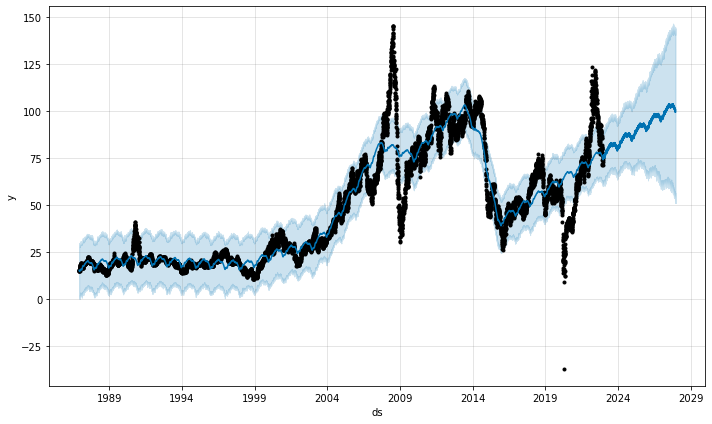

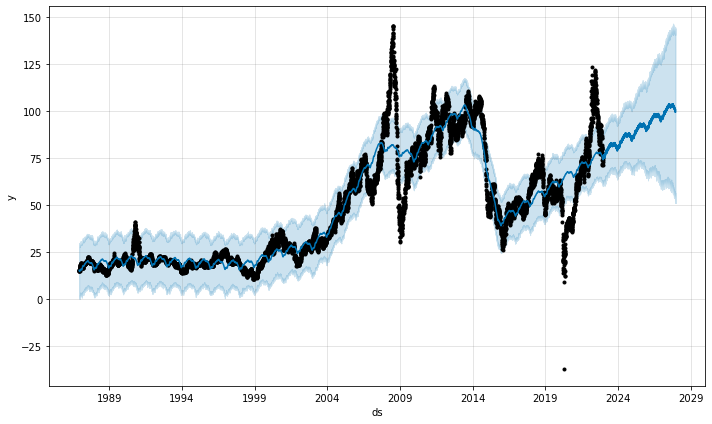

In [50]:
### plot the predicted projection
model.plot(prediction)

In [51]:
from prophet.plot import plot_plotly , plot_components_plotly
plot_plotly(model,prediction)

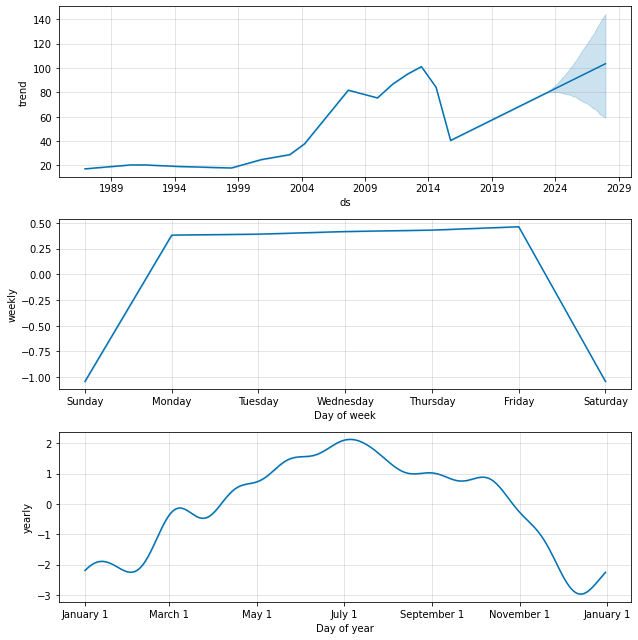

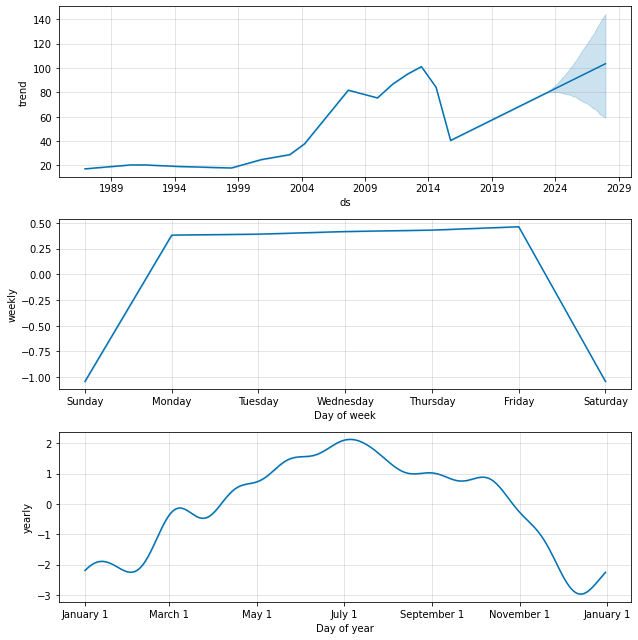

In [52]:
# Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [53]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv

  0%|          | 0/68 [00:00<?, ?it/s]

15:23:18 - cmdstanpy - INFO - Chain [1] start processing
15:23:18 - cmdstanpy - INFO - Chain [1] done processing
15:23:19 - cmdstanpy - INFO - Chain [1] start processing
15:23:19 - cmdstanpy - INFO - Chain [1] done processing
15:23:20 - cmdstanpy - INFO - Chain [1] start processing
15:23:20 - cmdstanpy - INFO - Chain [1] done processing
15:23:21 - cmdstanpy - INFO - Chain [1] start processing
15:23:21 - cmdstanpy - INFO - Chain [1] done processing
15:23:22 - cmdstanpy - INFO - Chain [1] start processing
15:23:22 - cmdstanpy - INFO - Chain [1] done processing
15:23:22 - cmdstanpy - INFO - Chain [1] start processing
15:23:23 - cmdstanpy - INFO - Chain [1] done processing
15:23:23 - cmdstanpy - INFO - Chain [1] start processing
15:23:23 - cmdstanpy - INFO - Chain [1] done processing
15:23:24 - cmdstanpy - INFO - Chain [1] start processing
15:23:25 - cmdstanpy - INFO - Chain [1] done processing
15:23:25 - cmdstanpy - INFO - Chain [1] start processing
15:23:26 - cmdstanpy - INFO - Chain [1]

ds       yhat  yhat_lower  yhat_upper      y     cutoff
0     1988-12-13  14.447186   13.773850   15.088850  15.93 1988-12-12
1     1988-12-14  14.445524   13.748031   15.123294  16.33 1988-12-12
2     1988-12-15  14.469490   13.753705   15.134142  16.39 1988-12-12
3     1988-12-16  14.453804   13.752810   15.127914  16.81 1988-12-12
4     1988-12-19  14.465246   13.817800   15.209961  16.24 1988-12-12
...          ...        ...         ...         ...    ...        ...
17724 2022-12-13  53.157034   39.830785   65.815413  75.44 2021-12-19
17725 2022-12-14  53.151822   39.830104   65.602826  77.14 2021-12-19
17726 2022-12-15  53.144007   39.722351   67.210260  75.89 2021-12-19
17727 2022-12-16  53.147715   39.642223   66.874615  74.19 2021-12-19
17728 2022-12-19  53.033773   39.047951   67.002115  75.05 2021-12-19

[17729 rows x 6 columns]

In [54]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon         mse       rmse        mae      mape     mdape     smape  \
0 37 days  235.840586  15.357102   9.871289  0.214579  0.140156  0.199524   
1 38 days  235.952194  15.360735   9.917922  0.215152  0.141456  0.200523   
2 39 days  235.619783  15.349912   9.929984  0.215444  0.143650  0.200961   
3 40 days  237.859989  15.422710   9.985266  0.216766  0.143972  0.201927   
4 41 days  237.753943  15.419272  10.004974  0.217236  0.144087  0.202508   

   coverage  
0  0.445905  
1  0.440664  
2  0.440100  
3  0.438338  
4  0.434819

In [55]:
df_p.head()

horizon         mse       rmse        mae      mape     mdape     smape  \
0 37 days  235.840586  15.357102   9.871289  0.214579  0.140156  0.199524   
1 38 days  235.952194  15.360735   9.917922  0.215152  0.141456  0.200523   
2 39 days  235.619783  15.349912   9.929984  0.215444  0.143650  0.200961   
3 40 days  237.859989  15.422710   9.985266  0.216766  0.143972  0.201927   
4 41 days  237.753943  15.419272  10.004974  0.217236  0.144087  0.202508   

   coverage  
0  0.445905  
1  0.440664  
2  0.440100  
3  0.438338  
4  0.434819

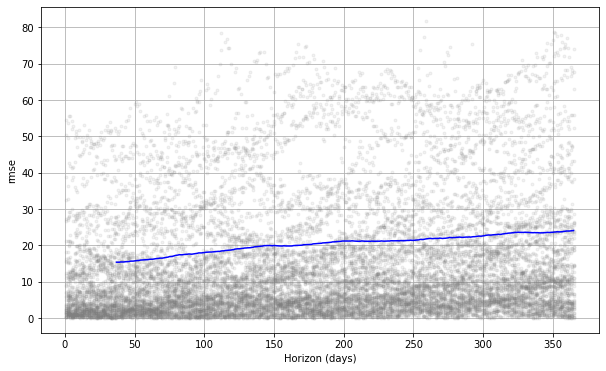

In [56]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')